<div style="width:50%; float:left;">
    <img src="support_files/AIBS_banner.png" width="430" align="left">
</div>

<div style="width:50%; float:right;">
    <img src="support_files/Dipde_Nick_final.png" width="100" height="100" align="right">
</div>

<div style="width:100%; float:left;">
    <hr>
</div>



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1>Example: Cortical Column</h1>
<p> In this example, a version of the Potjans and Diesmann cortical column <a href='#cortical_column' id='cortical_column_first_ref'>[1]</a> is simulated with dipde.

In [23]:
%matplotlib inline
import dipde
assert dipde.__version__ == '0.2.1'
import ipywidgets as ipw
import matplotlib.pyplot as plt
import itertools
import copy
import logging
logging.disable(logging.CRITICAL)

In [24]:
def get_network(f, dv = .0002):

    nsyn_background = {
        (23, 'e'): 1600,
        (23, 'i'): 1500,
        (4, 'e'): 2100,
        (4, 'i'): 1900,
        (5, 'e'): 2000,
        (5, 'i'): 1900,
        (6, 'e'): 2900,
        (6, 'i'): 2100
    }
    
    background_firing_rate = 8
    
    background_delay = {
        'e': 0.005,
        'i': 0.0
    }
    
    internal_population_sizes = {
        (23, 'e'): 20683,
        (23, 'i'): 5834,
        (4, 'e'): 21915,
        (4, 'i'): 5479,
        (5, 'e'): 4850,
        (5, 'i'): 1065,
        (6, 'e'): 14395,
        (6, 'i'): 2948
    }
    
    connection_probabilities = {((23,'e'),(23,'e')):.101,   ((23,'e'),(23,'i')):.135,  ((23,'e'),(4,'e')):.008,   ((23,'e'),(4,'i')):.069,   ((23,'e'),(5,'e')):.100,   ((23,'e'),(5,'i')):.055,   ((23,'e'),(6,'e')):.016,   ((23,'e'),(6,'i')):.036,
                                ((23,'i'),(23,'e')):.169,   ((23,'i'),(23,'i')):.137,  ((23,'i'),(4,'e')):.006,   ((23,'i'),(4,'i')):.003,   ((23,'i'),(5,'e')):.062,   ((23,'i'),(5,'i')):.027,   ((23,'i'),(6,'e')):.007,   ((23,'i'),(6,'i')):.001,
                                ((4,'e'),(23,'e')):.088,    ((4,'e'),(23,'i')):.032,   ((4,'e'),(4,'e')):.050,    ((4,'e'),(4,'i')):.079,    ((4,'e'),(5,'e')):.051,    ((4,'e'),(5,'i')):.026,    ((4,'e'),(6,'e')):.021,    ((4,'e'),(6,'i')):.003,
                                ((4,'i'),(23,'e')):.082,    ((4,'i'),(23,'i')):.052,   ((4,'i'),(4,'e')):.135,    ((4,'i'),(4,'i')):.160,    ((4,'i'),(5,'e')):.006,    ((4,'i'),(5,'i')):.002,    ((4,'i'),(6,'e')):.017,    ((4,'i'),(6,'i')):.001,
                                ((5,'e'),(23,'e')):.032,    ((5,'e'),(23,'i')):.075,   ((5,'e'),(4,'e')):.007,    ((5,'e'),(4,'i')):.003,    ((5,'e'),(5,'e')):.083,    ((5,'e'),(5,'i')):.060,    ((5,'e'),(6,'e')):.057,    ((5,'e'),(6,'i')):.028,
                                ((5,'i'),(23,'e')):0,       ((5,'i'),(23,'i')):0,      ((5,'i'),(4,'e')):.0003,   ((5,'i'),(4,'i')):0,       ((5,'i'),(5,'e')):.373,    ((5,'i'),(5,'i')):.316,    ((5,'i'),(6,'e')):.020,    ((5,'i'),(6,'i')):.008,
                                ((6,'e'),(23,'e')):.008,    ((6,'e'),(23,'i')):.004,   ((6,'e'),(4,'e')):.045,    ((6,'e'),(4,'i')):.106,    ((6,'e'),(5,'e')):.020,    ((6,'e'),(5,'i')):.009,    ((6,'e'),(6,'e')):.040,    ((6,'e'),(6,'i')):.066,
                                ((6,'i'),(23,'e')):0,       ((6,'i'),(23,'i')):0,      ((6,'i'),(4,'e')):0,       ((6,'i'),(4,'i')):0,       ((6,'i'),(5,'e')):0,       ((6,'i'),(5,'i')):0,       ((6,'i'),(6,'e')):.225,    ((6,'i'),(6,'i')):.144}
    
    conn_weights = {
        'e': .175*1e-3,
        'i': -.7*1e-3
    }
    
    position_dict = {
        (23, 'e'): (0,0,3),
        (23, 'i'): (0,1,3),
        (4, 'e'): (0,0,2),
        (4, 'i'): (0,1,2),
        (5, 'e'): (0,0,1),
        (5, 'i'): (0,1,1),
        (6, 'e'): (0,0,0),
        (6, 'i'): (0,1,0)
    }
    
    internal_population_settings = {'v_min': -.03, 
                                    'v_max':.015,
                                    'dv':dv,
                                    'update_method':'gmres',
                                    'tau_m':.01,
                                    'tol':1e-7,
                                    'record':True}
    
    # Create populations:
    background_population_dict = {}
    internal_population_dict = {}
    for layer, celltype in itertools.product([23, 4, 5, 6], ['e', 'i']):    
        background_population_dict[layer, celltype] = dipde.ExternalPopulation('Heaviside(t)*%s' % background_firing_rate, record=False, metadata={'layer':layer, 'celltype':celltype})
        curr_population_settings = copy.copy(internal_population_settings)
        x_pos, y_pos, z_pos = position_dict[layer, celltype]
        metadata={'layer':layer, 'celltype':celltype, 'x':x_pos, 'y':y_pos, 'z':z_pos,}
        curr_population_settings.update({'metadata':metadata})
        internal_population_dict[layer, celltype] = dipde.InternalPopulation(**curr_population_settings)
    
    # Create background connections:
    connection_list = []
    for layer, celltype in itertools.product([23, 4, 5, 6], ['e', 'i']):
        source_population = background_population_dict[layer, celltype]
        target_population = internal_population_dict[layer, celltype]
        if celltype == 'e':
            background_delay = .005
        else:
            background_delay = 0.
        curr_connection = dipde.Connection(source_population, target_population, nsyn_background[layer, celltype], weights=conn_weights['e'], delays=background_delay) 
        connection_list.append(curr_connection)
    
    # Create recurrent connections:
    for source_layer, source_celltype in itertools.product([23, 4, 5, 6], ['e', 'i']):
        for target_layer, target_celltype in itertools.product([23, 4, 5, 6], ['e', 'i']):
            source_population = internal_population_dict[source_layer, source_celltype]
            target_population = internal_population_dict[target_layer, target_celltype]
            nsyn = connection_probabilities[(source_layer, source_celltype), (target_layer, target_celltype)]*internal_population_sizes[source_layer, source_celltype]
            weight = conn_weights[source_celltype]
            curr_connection = dipde.Connection(source_population, target_population, nsyn, weights=weight, delays=0)
            connection_list.append(curr_connection)
    
    # Create simulation:
    population_list = background_population_dict.values() + internal_population_dict.values()

    def update_callback(n):
        f.value += 1
    network = dipde.Network(population_list, connection_list, update_callback=update_callback)
    
    return network

Run Time: 8.58590292931


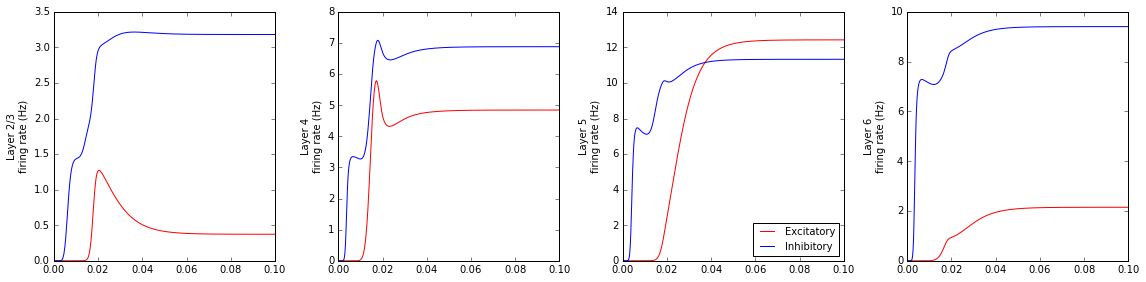

In [25]:
from IPython.display import display



# Simulation settings:
t0 = 0.
dt = .0002
tf = .1
dv = .0002

f = ipw.FloatProgress(min=0, max=int((tf-t0)/dt))
display(f)
network = get_network(f, dv=dv)
internal_population_dict = {}
for p in network.population_list:
    if isinstance(p, dipde.InternalPopulation):
        layer = p.metadata['layer']
        celltype = p.metadata['celltype']
        internal_population_dict[layer, celltype] = p

# Run simulation:
network.run(dt=dt, tf=tf, t0=t0)
print 'Run Time:', network.run_time

# Visualize:
y_label_dict = {23:'2/3', 4:'4', 5:'5', 6:'6'}

result_dict = {}
for row_ind, layer in enumerate([23, 4, 5, 6]):
    for plot_color, celltype in zip(['r', 'b'],['e', 'i']):
        curr_population = internal_population_dict[layer, celltype]
        result_dict[layer, celltype] = curr_population.firing_rate_record[-1]

fig, axes = plt.subplots(nrows=1, ncols=4, **{'figsize': (16, 4)})
for row_ind, layer in enumerate([23, 4, 5, 6]):
    for plot_color, celltype in zip(['r', 'b'], ['e', 'i']):
        curr_population = internal_population_dict[layer, celltype]
        axes[row_ind].plot(curr_population.t_record, curr_population.firing_rate_record, plot_color)


    axes[row_ind].set_xlim([0,tf])
    axes[row_ind].set_ylim(ymin=0)
    axes[row_ind].set_ylabel('Layer %s\nfiring rate (Hz)' % y_label_dict[layer])
    if layer == 5: axes[row_ind].legend(['Excitatory', 'Inhibitory'], prop={'size':10}, loc=4)

fig.tight_layout()
plt.show()  # pragma: no cover

<a id='cortical_column' href='#cortical_column_first_ref'>[1]</a> Potjans T.C., & Diesmann, M. (2014) <a href=http://cercor.oxfordjournals.org/content/early/2012/11/30/cercor.bhs358.full> The cell-type specific cortical microcircuit: relating structure and activity in a full-scale spiking network model. </a> Cerebral Cortex 24: 785–806.



